#Personal Dataset

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
tickers = [
    # Luxury
    "MC.PA","KER.PA","RMS.PA","CFR.SW","1913.HK","BRBY.L","MONC.MI","SFER.MI",
    "BOSS.DE","PUM.DE","ADS.DE","CPRI","TPR","VFC","ITX.MC","9983.T","ZAL.DE","MOV",
     # Sportswear / athleisure
    "NKE","ADDYY","LULU","SKX","UAA","UA","COLM","DECK",
    # US retailers
    "TJX","ROST","M","KSS","URBN","BURL",
    # Beauty / cosmetics
    "OR.PA","EL","COTY","4911.T","4452.T","4922.T",
    "051900.KQ","090430.KQ","BEI.DE","PG","UL","ULVR.L","RKT.L","CL","CLX","KMB","CHD",
    # Healthcare/personal care majors
    "JNJ","DHR","LLY","PFE","KHC",
    # E-commerce / fashion
    "BABA","JD","MELI","SHOP","AMZN","EBAY","SE","VSCO",
    # Specialty luxury/retail brands
    "PVH","RL","ANF","AEO","LEVI","OXM","WSM","RH",
    # Asian fashion/retail
    "8233.T","9843.T","3391.T","3086.T",
    # Department stores global
    "WMT","COST","TGT","KR","HD","LOW",
    # Luxury autos (proxy luxury exposure)
    "RACE","BMW.DE","MBG.DE","VOW3.DE","TSLA",
    # More European luxury
    "FILA.MI","SMCP.PA","FR.PA","ASC.L",
    #More High-growth brands
     "CPNG","MNSO","REAL","RVLV",
    "YSG","AMYZF","OLLI","BIRD","GOOS","ONON","FIGS"
]
data = yf.download(tickers, start='2022-09-30', end='2025-09-30', group_by='ticker', progress=True)
all_data = []
for ticker in tickers:
    try:
        df = data[ticker][['Close','Volume']].copy()
        df['Ticker'] = ticker
        df.reset_index(inplace=True)
        all_data.append(df)
    except Exception as e:
       print(f"⚠ Could not fetch {ticker}: {e}")

equity = pd.concat(all_data, ignore_index=True)
equity.dropna(subset=['Close','Volume'], inplace=True)
equity.to_csv('fashion_luxury_equity_data.csv', index=False)
print("✅ Saved to fashion_luxury_equity_data.csv")
from google.colab import files
files.download('fashion_luxury_equity_data.csv')

/tmp/ipython-input-2422050317.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2022-09-30', end='2025-09-30', group_by='ticker', progress=True)
[*********************100%***********************]  100 of 100 completed


✅ Saved to fashion_luxury_equity_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Chapter 2: Descriptive Analysis

In [13]:
subset_tickers = ["OR.PA", "EL", "4911.T", "4452.T", "4922.T", "PG"]
subset_equity = equity[equity['Ticker'].isin(subset_tickers)].copy()
subset_equity = subset_equity[['Date', 'Ticker', 'Close']]
subset_equity.reset_index(drop=True, inplace=True)
wide_equity = subset_equity.pivot(index='Date', columns='Ticker', values='Close')
wide_equity

Ticker,4452.T,4911.T,4922.T,EL,OR.PA,PG
Date,,,,,,
2022-09-30,5467.685059,4890.451172,14241.301758,204.494949,315.026276,117.029213
2022-10-03,5289.693848,4784.052734,14183.954102,207.516418,311.639984,119.124138
2022-10-04,5484.372070,5016.195312,15311.788086,215.254822,322.609863,120.598030
2022-10-05,5451.925781,5051.016113,15350.020508,214.288727,320.129669,119.763741
2022-10-06,5389.814453,5041.343262,15120.630859,216.997650,318.841888,117.242416
...,...,...,...,...,...,...
2025-09-23,NaN,NaN,NaN,87.720001,374.700012,152.500000
2025-09-24,6549.000000,2569.500000,5870.000000,85.330002,367.100006,152.419998
2025-09-25,6516.000000,2553.000000,5976.000000,83.989998,366.100006,152.149994


In [3]:
wide_equity_filled = wide_equity.fillna(wide_equity.rolling(window=5, min_periods=1).mean())
wide_equity_filled

Ticker,4452.T,4911.T,4922.T,EL,OR.PA,PG
Date,,,,,,
2022-09-30,5467.685547,4890.451660,14241.301758,204.494919,315.026337,117.029198
2022-10-03,5289.693359,4784.053223,14183.954102,207.516434,311.639954,119.124138
2022-10-04,5484.373047,5016.195312,15311.787109,215.254852,322.609863,120.598038
2022-10-05,5451.925781,5051.016113,15350.020508,214.288712,320.129669,119.763763
2022-10-06,5389.814453,5041.343750,15120.630859,216.997650,318.841919,117.242416
...,...,...,...,...,...,...
2025-09-23,6671.500000,2469.625000,5962.250000,87.720001,374.700012,152.500000
2025-09-24,6549.000000,2569.500000,5870.000000,85.330002,367.100006,152.419998
2025-09-25,6516.000000,2553.000000,5976.000000,83.989998,366.100006,152.149994


In [4]:
log_diff = np.log(wide_equity_filled/wide_equity_filled.shift(1)).dropna()
returns = 100 * log_diff
returns

Ticker,4452.T,4911.T,4922.T,EL,OR.PA,PG
Date,,,,,,
2022-10-03,-3.309513,-2.199652,-0.403498,1.466741,-1.080772,1.774267
2022-10-04,3.614251,4.738360,7.651160,3.661215,3.459521,1.229689
2022-10-05,-0.593388,0.691769,0.249388,-0.449846,-0.771761,-0.694185
2022-10-06,-1.145794,-0.191677,-1.505672,1.256230,-0.403070,-2.127744
2022-10-07,-0.985229,0.459413,0.692907,-4.157715,-1.841843,-1.762758
...,...,...,...,...,...,...
2025-09-23,1.899055,-1.362344,1.219193,0.514321,3.448153,-0.373078
2025-09-24,-1.853236,3.964501,-1.559329,-2.762382,-2.049143,-0.052474
2025-09-25,-0.505168,-0.644219,1.789681,-1.582840,-0.272777,-0.177302


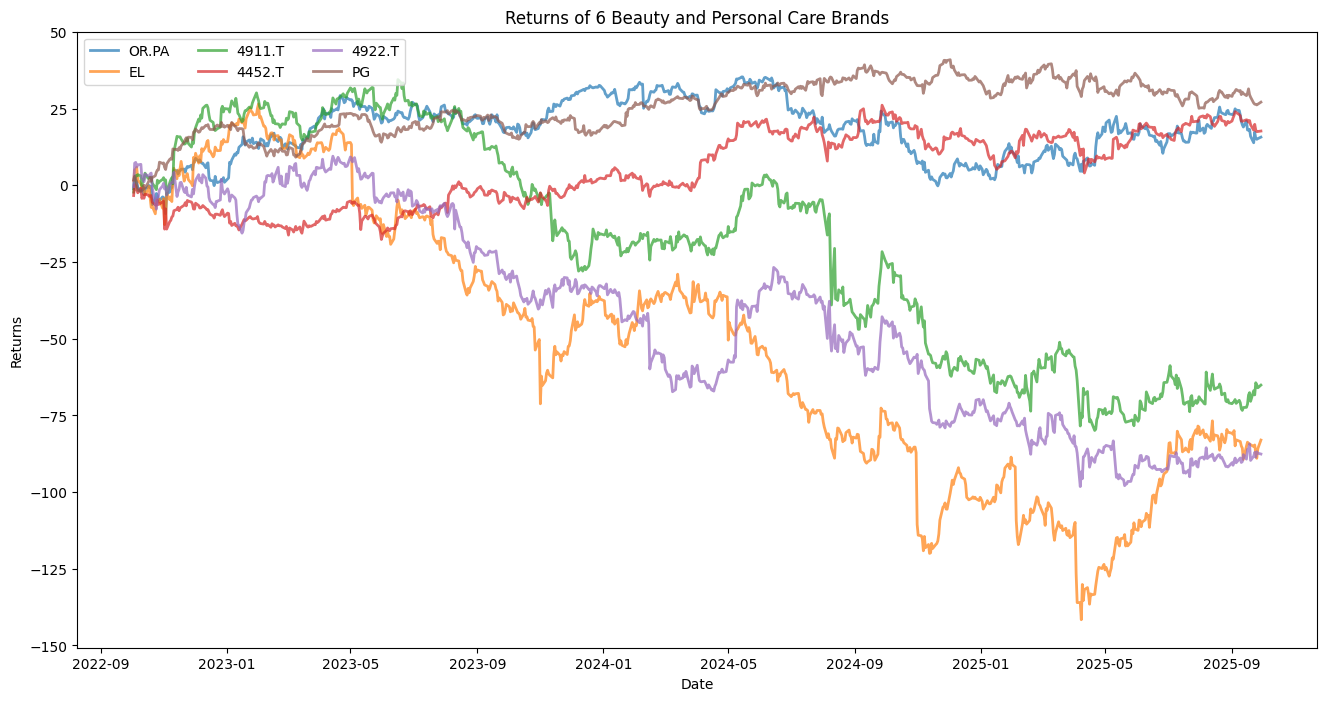

In [5]:
returns_adjusted = returns.cumsum()
plt.figure(figsize = (16,8))
for company in subset_tickers:
    plt.plot(returns_adjusted[company], label = company, alpha = 0.7, linewidth = 2)
plt.title('Returns of 6 Beauty and Personal Care Brands')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(loc = 'upper left', ncol = 3)
plt.show()

Stable and positive returns: P&G, L'Oreal, and Kao Corporation. Negative returns: Estee Lauder, KOSE, and Shiseido.

In [6]:
summary_stats = returns.describe()
kurtosis_row = pd.DataFrame([returns.kurtosis()], index=['kurtosis'])
skewness_row = pd.DataFrame([returns.skew()], index = ['skewness'])
summary_stats = pd.concat([summary_stats, kurtosis_row, skewness_row])
sorted_stats = summary_stats.sort_values(by='kurtosis', axis=1, ascending=False)
sorted_stats.transpose()

,count,mean,std,min,25%,50%,75%,max,kurtosis,skewness
Ticker,,,,,,,,,,
EL,779.0,-0.106604,2.898912,-23.439415,-1.419619,-0.123478,1.258619,11.498241,14.739617,-1.764338
4911.T,779.0,-0.083593,2.564756,-16.866792,-1.176737,-0.077068,0.972969,18.455788,12.226447,-0.512162
4922.T,779.0,-0.112446,2.355365,-14.574546,-1.188523,-0.047074,1.088275,16.488225,8.071256,-0.302819
4452.T,779.0,0.022746,1.372461,-9.114203,-0.638806,0.014987,0.750605,6.619935,7.518617,-0.421942
OR.PA,779.0,0.020196,1.441661,-7.882967,-0.829877,0.000000,0.868311,6.730760,2.938136,0.057926
PG,779.0,0.034849,1.036256,-5.141845,-0.534347,0.065032,0.641921,4.055678,2.806064,-0.366333


- High kurtosis (fat tails / extreme events): EL, 4911.T (Kao), 4922.T (Kose), 4452.T (Shiseido)
These stocks are more prone to rare, extreme returns, meaning while most days may show moderate fluctuations, there’s higher likelihood of sudden large gains or losses. Investors with tail-risk sensitivity should be cautious.
- Low kurtosis (thin tails / more stable): OR.PA (L’Oreal), PG
Returns are more consistent with fewer extreme outliers. This makes them relatively safer for conservative or loss-averse investors.
- Most stocks show negative skew, especially EL (-1.76), indicating occasional large losses, even if average returns are small.
- OR.PA (L’Oreal) has slightly positive skew, suggesting a small chance of larger-than-expected gains.

##Sharpe Ratio and Sortino Ratio

In [14]:
trading_days_per_year = 1206/5
risk_free = 0.045
annualized_returns = log_diff.mean() * trading_days_per_year
annualized_volatility = log_diff.std() * np.sqrt(trading_days_per_year)
sharpe_ratio = (annualized_returns - risk_free)/ annualized_volatility
sharpe_ratio.sort_values(ascending = False)

,0
Ticker,
PG,0.242675
4452.T,0.046278
OR.PA,0.016583
4911.T,-0.619164
EL,-0.671072
4922.T,-0.864454


In [15]:
downside_returns = log_diff[log_diff <0]
downside_volatility = downside_returns.std() * np.sqrt(trading_days_per_year)
sortino_ratio = (annualized_returns - risk_free)/downside_volatility
sortino_ratio.sort_values(ascending = False)

,0
Ticker,
PG,0.334090
4452.T,0.059983
OR.PA,0.025388
EL,-0.773537
4911.T,-0.777800
4922.T,-1.110585


##Portfolio Selection

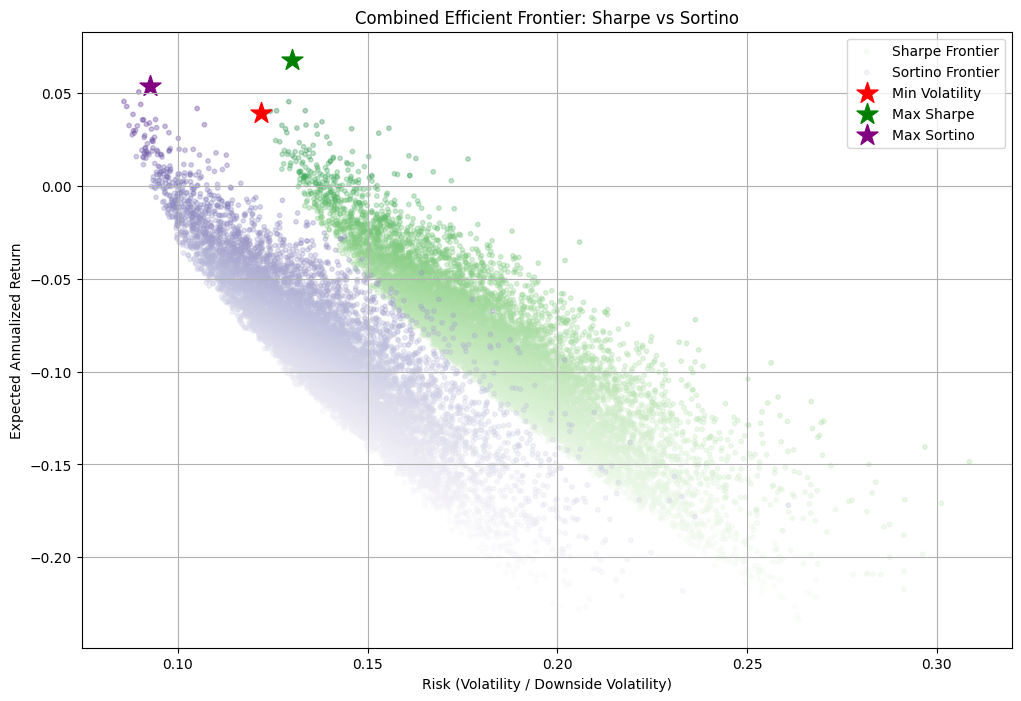

Minimum Volatility Portfolio Weights:
 OR.PA     0.3015
EL        0.0218
4911.T    0.0138
4452.T    0.0555
4922.T    0.1661
PG        0.4413
Name: 9876, dtype: float64
Expected Annualized Return: 0.0393

Maximum Sharpe Ratio Portfolio Weights:
 OR.PA     0.1265
EL        0.0069
4911.T    0.0037
4452.T    0.0142
4922.T    0.1248
PG        0.7238
Name: 9063, dtype: float64
Expected Annualized Return: 0.0678

Maximum Sortino Portfolio Weights:
 OR.PA     0.2696
EL        0.0054
4911.T    0.0276
4452.T    0.0323
4922.T    0.0039
PG        0.6611
Name: 73, dtype: float64
Expected Annualized Return: 0.0537


In [16]:
annualized_cov = log_diff.cov() * trading_days_per_year
num_assets = len(subset_tickers)
num_portfolios = 10000
results_sharpe = np.zeros((num_portfolios, 3 + num_assets))  # return, vol, sharpe + weights
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_return = np.sum(weights * annualized_returns)
    port_vol = np.sqrt(weights.T @ annualized_cov.values @ weights)
    port_sharpe = (port_return - risk_free) / port_vol
    results_sharpe[i, 0] = port_return
    results_sharpe[i, 1] = port_vol
    results_sharpe[i, 2] = port_sharpe
    results_sharpe[i, 3:] = weights
columns = ['Return','Volatility','Sharpe'] + list(subset_tickers)
sharpe_df = pd.DataFrame(results_sharpe, columns=columns)
min_vol_idx = sharpe_df['Volatility'].idxmin()
max_sharpe_idx = sharpe_df['Sharpe'].idxmax()
min_vol_weights = sharpe_df.loc[min_vol_idx, subset_tickers]
max_sharpe_weights = sharpe_df.loc[max_sharpe_idx, subset_tickers]
min_vol_return = sharpe_df.loc[min_vol_idx, 'Return']
max_sharpe_return = sharpe_df.loc[max_sharpe_idx, 'Return']
results_sortino = np.zeros((num_portfolios, 3 + num_assets))  # return, downside_vol, sortino + weights
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_returns = (log_diff * weights).sum(axis=1)
    port_return = np.sum(weights * annualized_returns)
    downside_returns = port_returns[port_returns < 0]
    port_downside_vol = downside_returns.std() * np.sqrt(trading_days_per_year) if len(downside_returns) > 0 else 1e-8
    port_sortino = (port_return - risk_free) / port_downside_vol
    results_sortino[i, 0] = port_return
    results_sortino[i, 1] = port_downside_vol
    results_sortino[i, 2] = port_sortino
    results_sortino[i, 3:] = weights
columns_sortino = ['Return','DownsideVolatility','Sortino'] + list(subset_tickers)
sortino_df = pd.DataFrame(results_sortino, columns=columns_sortino)
max_sortino_idx = sortino_df['Sortino'].idxmax()
max_sortino_weights = sortino_df.loc[max_sortino_idx, subset_tickers]
max_sortino_return = sortino_df.loc[max_sortino_idx, 'Return']
# --- Combined Frontier Plot ---
plt.figure(figsize=(12,8))
# Sharpe frontier
plt.scatter(sharpe_df['Volatility'], sharpe_df['Return'], c=sharpe_df['Sharpe'], cmap='Greens', alpha=0.3, s=10, label='Sharpe Frontier')
# Sortino frontier
plt.scatter(sortino_df['DownsideVolatility'], sortino_df['Return'], c=sortino_df['Sortino'], cmap='Purples', alpha=0.3, s=10, label='Sortino Frontier')
# Highlight key portfolios
plt.scatter(sharpe_df.loc[min_vol_idx,'Volatility'], sharpe_df.loc[min_vol_idx,'Return'], color='red', marker='*', s=250, label='Min Volatility')
plt.scatter(sharpe_df.loc[max_sharpe_idx,'Volatility'], sharpe_df.loc[max_sharpe_idx,'Return'], color='green', marker='*', s=250, label='Max Sharpe')
plt.scatter(sortino_df.loc[max_sortino_idx,'DownsideVolatility'], sortino_df.loc[max_sortino_idx,'Return'], color='purple', marker='*', s=250, label='Max Sortino')

plt.xlabel('Risk (Volatility / Downside Volatility)')
plt.ylabel('Expected Annualized Return')
plt.title('Combined Efficient Frontier: Sharpe vs Sortino')
plt.legend()
plt.grid(True)
plt.show()

# --- Print Weights and Expected Returns ---
print("Minimum Volatility Portfolio Weights:\n", min_vol_weights.round(4))
print("Expected Annualized Return: {:.4f}\n".format(min_vol_return))

print("Maximum Sharpe Ratio Portfolio Weights:\n", max_sharpe_weights.round(4))
print("Expected Annualized Return: {:.4f}\n".format(max_sharpe_return))

print("Maximum Sortino Portfolio Weights:\n", max_sortino_weights.round(4))
print("Expected Annualized Return: {:.4f}".format(max_sortino_return))

#Chapter 3+4: Classical Linear Regression Model
(Focus on P&G)

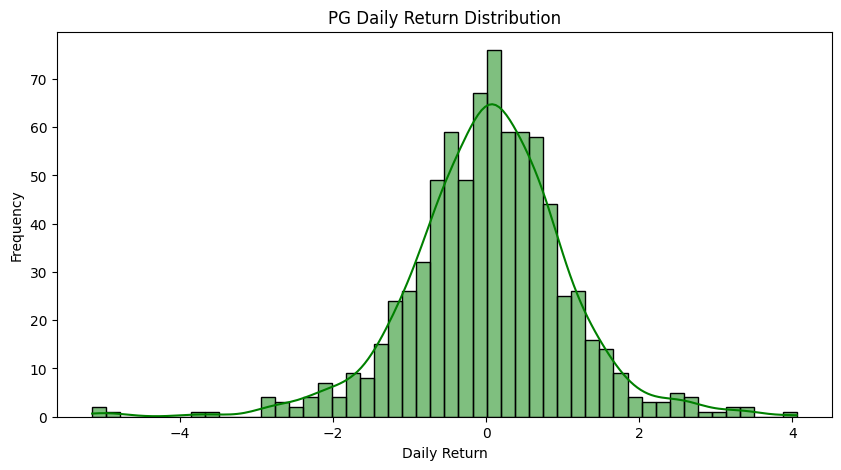

In [10]:
pg_returns = returns['PG']
plt.figure(figsize=(10,5))
sns.histplot(pg_returns, bins=50, kde=True, color='green')
plt.title("PG Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

##Simple OLS: P&G and L'Oreal

In [19]:
X_simple = sm.add_constant(log_diff['OR.PA'])  # predictor
y = log_diff['PG']                           # dependent
ols_simple = sm.OLS(y, X_simple).fit()
print("Simple OLS: PG ~ L'Oreal")
print(ols_simple.summary())

Simple OLS: PG ~ L'Oreal
                            OLS Regression Results                            
Dep. Variable:                     PG   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     24.49
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           9.17e-07
Time:                        02:29:51   Log-Likelihood:                 2466.9
No. Observations:                 779   AIC:                            -4930.
Df Residuals:                     777   BIC:                            -4921.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      

##Multiple Regression and F-test

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
other_brands = ['OR.PA', 'EL', '4911.T', '4452.T', '4922.T']
X_multi = sm.add_constant(log_diff[other_brands])
vif_data = pd.DataFrame()
vif_data["feature"] = X_multi.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi.values, i) for i in range(X_multi.shape[1])]
print("\nVIF for Multiple Regression:")
print(vif_data.round(4))


VIF for Multiple Regression:
  feature     VIF
0   const  1.0060
1   OR.PA  1.1421
2      EL  1.1150
3  4911.T  1.7761
4  4452.T  1.2251
5  4922.T  1.8036


In [21]:
ols_multi = sm.OLS(y, X_multi).fit()
print("\nMultiple Regression: PG ~ other 5 brands")
print(ols_multi.summary())


Multiple Regression: PG ~ other 5 brands
                            OLS Regression Results                            
Dep. Variable:                     PG   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     13.31
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           1.86e-12
Time:                        02:30:01   Log-Likelihood:                 2487.0
No. Observations:                 779   AIC:                            -4962.
Df Residuals:                     773   BIC:                            -4934.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [22]:
f_stat = ols_multi.fvalue
f_pvalue = ols_multi.f_pvalue
print("\nF-test for Multiple Regression overall significance:")
print(f"F-statistic: {f_stat:.4f}, p-value: {f_pvalue:.4f}")


F-test for Multiple Regression overall significance:
F-statistic: 13.3050, p-value: 0.0000


##CAPM

In [23]:
market = yf.download(['^GSPC'], start = '2022-09-30', end = '2025-09-30')['Close']
market_returns = 100*np.log(market/market.shift(1)).dropna()
rf_annual = yf.download(['^FVX'], start = '2022-09-30', end = '2025-09-30')['Close']
rf_daily = (rf_annual/252).dropna()
rf_daily

/tmp/ipython-input-2099697241.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(['^GSPC'], start = '2022-09-30', end = '2025-09-30')['Close']
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2099697241.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  rf_annual = yf.download(['^FVX'], start = '2022-09-30', end = '2025-09-30')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,^FVX
Date,
2022-09-30,0.016036
2022-10-03,0.015409
2022-10-04,0.015238
2022-10-05,0.015710
2022-10-06,0.016111
...,...
2025-09-23,0.014591
2025-09-24,0.014722
2025-09-25,0.014948


In [24]:
PG_CAPM = pd.DataFrame({'return_S&P' : market_returns['^GSPC'],
                        'risk_free' : rf_daily['^FVX'],
                       'return_PG': returns['PG'],
                       'exr_PG' : returns['PG'] - rf_daily['^FVX'],
                       'exrsp' : market_returns['^GSPC'] - rf_daily['^FVX']}
)
PG_CAPM.dropna()

,return_S&P,risk_free,return_PG,exr_PG,exrsp
Date,,,,,
2022-10-03,2.555458,0.015409,1.774267,1.758858,2.540049
2022-10-04,3.012534,0.015238,1.229689,1.214451,2.997296
2022-10-05,-0.201999,0.015710,-0.694185,-0.709895,-0.217709
2022-10-06,-1.029792,0.016111,-2.127744,-2.143855,-1.045903
2022-10-07,-2.840320,0.016409,-1.762758,-1.779167,-2.856728
...,...,...,...,...,...
2025-09-23,-0.551735,0.014591,-0.373078,-0.387670,-0.566326
2025-09-24,-0.285068,0.014722,-0.052474,-0.067196,-0.299790
2025-09-25,-0.502165,0.014948,-0.177302,-0.192250,-0.517113


In [25]:
formula_PG = 'exr_PG ~ exrsp'
CAPM_PG = smf.ols(formula = formula_PG, data = PG_CAPM).fit()
print(CAPM_PG.summary())

                            OLS Regression Results                            
Dep. Variable:                 exr_PG   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     51.17
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           2.02e-12
Time:                        02:30:22   Log-Likelihood:                -1068.7
No. Observations:                 750   AIC:                             2141.
Df Residuals:                     748   BIC:                             2151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0125      0.037      0.338      0.7

CAPM Interpretation for P&G:

- The beta (β) of P&G is estimated at 0.2572 with a p-value ≈ 0, indicating the result is statistically significant.
- Since β < 1, P&G is less volatile than the market: on average, a 1% change in the market return corresponds to approximately a 0.26% change in P&G’s stock return in the same direction.
- The R-squared of 0.063 shows that only about 6.3% of the variation in P&G’s excess returns is explained by market movements, suggesting that other factors besides the market influence P&G’s returns.

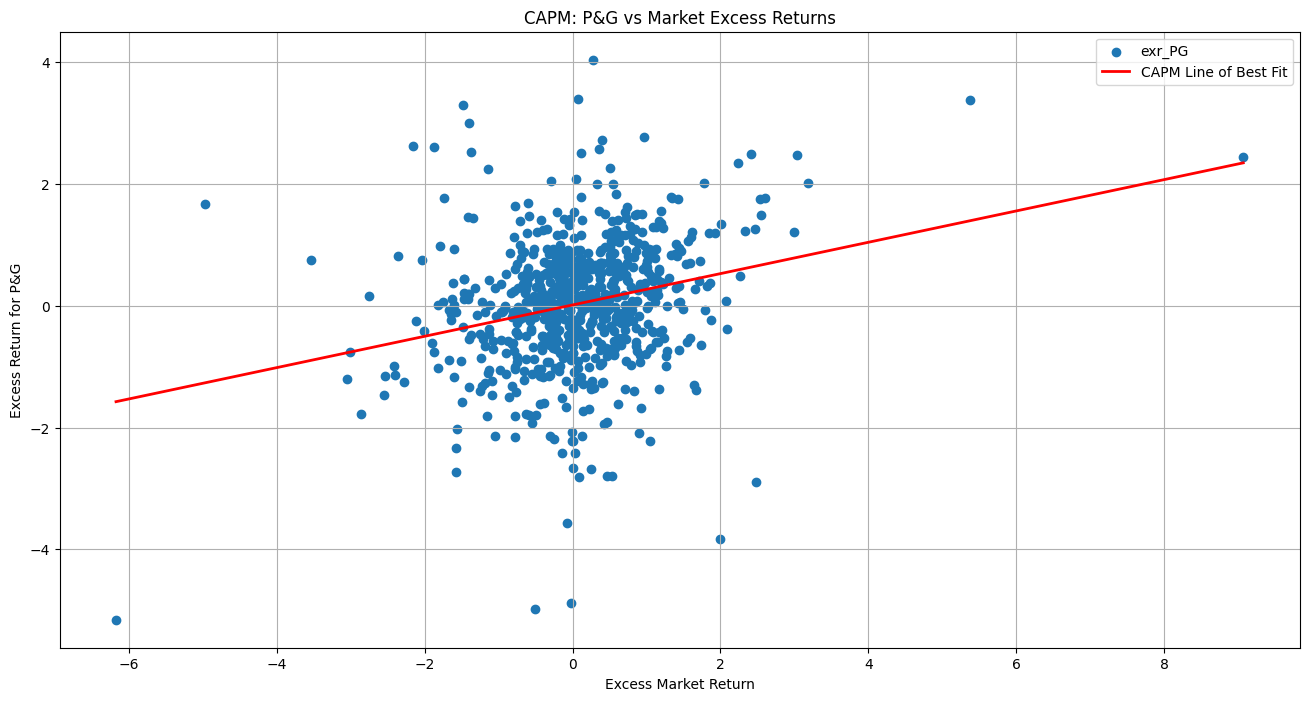

In [26]:
plt.figure(figsize=(16,8))
plt.scatter(data = PG_CAPM, x = 'exrsp', y = 'exr_PG')
x_vals = np.linspace(PG_CAPM['exrsp'].min(), PG_CAPM['exrsp'].max(), 100)
y_vals = CAPM_PG.params['Intercept'] + CAPM_PG.params['exrsp'] * x_vals
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='CAPM Line of Best Fit')
plt.xlabel('Excess Market Return')
plt.ylabel('Excess Return for P&G')
plt.title('CAPM: P&G vs Market Excess Returns')
plt.grid(True)
plt.legend()
plt.show()

#Statistical Robustness Test

##Heteroscedasticity

As I did some research, there are two most common tests for Heteroscedasticity: the White Test and Breusch-Pagan test. Although the Breush-Pagan test might be easier to compute, I realized that this approach assumes the variance of the errors is a linear function of the independent variables. Therefore, I want to try both tests for better robustness.

In [27]:
#Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
residuals = CAPM_PG.resid
exog = CAPM_PG.model.exog
bp_test = het_breuschpagan(residuals, exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(4.2383256181753595), 'p-value': np.float64(0.03952112550878689), 'f-value': np.float64(4.251046508957554), 'f p-value': np.float64(0.03957108422041058)}


In [28]:
#White Test
from statsmodels.stats.diagnostic import het_white
residuals = CAPM_PG.resid
exog = CAPM_PG.model.exog
white_test = het_white(residuals, exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': np.float64(19.792974366883957), 'Test Statistic p-value': np.float64(5.035124644768951e-05), 'F-Statistic': np.float64(10.124082166453347), 'F-Test p-value': np.float64(4.588828212818284e-05)}


##Normality of Residuals

From what I understand, there are two ways to check normality of residuals: visual inspection and Statistical Test. For visual inspection, Q-Q plot serves as a more precise diagnosis since it can detect skewness and tail deviations. Additionally, because of a medium sample size, for Statistical Test, I will choose the Jarque-Bera Test instead of the Shapiro-Wilk test (suitable for sample size <30).

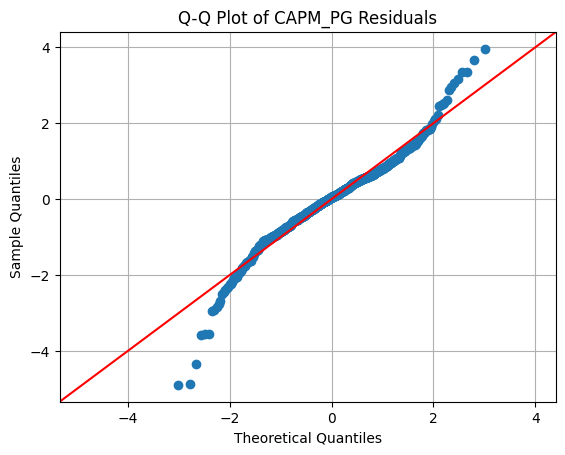

In [29]:
#Q-Q plot
import statsmodels.api as sm
sm.qqplot(CAPM_PG.resid, line='45')
plt.title('Q-Q Plot of CAPM_PG Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [30]:
# Jarque-Bera Test
from statsmodels.stats.stattools import jarque_bera
jb_stat, jb_p, _, _ = jarque_bera(CAPM_PG.resid)
print(f"Jarque-Bera p-value: {jb_p}")

Jarque-Bera p-value: 1.2445714136412512e-64


##Outlier and Influential Points

For a highly volatile data like stock price returns, I will try to detect whether there are some outliers which distorted the model. Cook's Distance is considered the most comprehensive method for this evaluation since it takes both residual size and leverage into consideration.

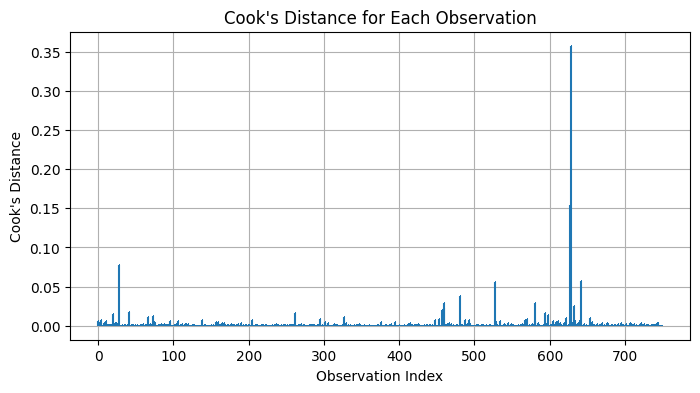

Influential points (Cook's D > 0.0053): [0, 4, 10, 19, 28, 41, 66, 73, 96, 106, 138, 205, 262, 295, 327, 376, 448, 453, 457, 459, 460, 481, 487, 493, 527, 534, 567, 570, 580, 581, 594, 598, 604, 611, 621, 627, 628, 632, 633, 640, 641, 653]
Number of influential points: 42


In [31]:
influence = CAPM_PG.get_influence()
cooks_dist = influence.cooks_distance[0]
plt.figure(figsize=(8, 4))
plt.stem(cooks_dist, markerfmt=",", basefmt=" ")
plt.title("Cook's Distance for Each Observation")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.grid(True)
plt.show()
n = len(cooks_dist)
threshold = 4/n
influential_points = [i for i, val in enumerate(cooks_dist) if val > threshold]
print(f"Influential points (Cook's D > {threshold:.4f}): {influential_points}")
print(f'Number of influential points: {len(influential_points)}')

##Autocorrelation

Based on external sources, there are two types of tests for autocorrelation for linear-regression, time-series models: Durbin-Watson and Breusch-Godfrey.

In [32]:
# Durbin-Watson
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(CAPM_PG.resid)
print(f'Durbin-Watson statistic: {dw_stat:.4f}')

Durbin-Watson statistic: 1.9664


DW is approximately 2 suggests there is no autocorrelation at lag 1. Next, I will continue with Breush-Godfrey, using nlags = 5( number of trading days per week).

In [33]:
#Breusch-Godfrey
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
bg_test = acorr_breusch_godfrey(CAPM_PG, nlags=5)
labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']
print(dict(zip(labels, bg_test)))

{'LM Statistic': np.float64(2.4660771342263077), 'LM p-value': np.float64(0.7815950306342282), 'F-Statistic': 0.6089319597225742, 'F p-value': 0.6931150379826323}


p-value = 0.78, much higher than 0.05. It is confirmed that there is no autocorrelation among CAPM residuals, even up to 5 days.

##Stability / Structural Breaks

For financial data that is highly sensitive to evolving market conditions—such as the impacts from the COVID-19 pandemic or trade policies during the Trump administration—it is essential to rigorously test for structural breaks in the model. This ensures that our risk-return relationship remains robust and accurately reflects changing economic regimes. While the Chow Test offers a straightforward method for detecting breaks at known points in time, the challenge lies in the uncertainty around precise break dates— I am not sure about the start date of the COVID-19 impact—and the likelihood of multiple influential events affecting P&G’s stock returns. Consequently, relying solely on the Chow Test would necessitate conducting multiple tests at various candidate breakpoints, which may complicate the analysis and increase the risk of multiple testing issues. Similarly, the CUSUM and CUSUMSQ tests do not identify the exact timing or number of breaks, so I decided to choose the Bai-Perron test.

In [34]:
#CUSUM
from statsmodels.stats.diagnostic import breaks_cusumolsresid
cusum_test = breaks_cusumolsresid(CAPM_PG.resid, ddof=CAPM_PG.df_model)
print('CUSUM Test Statistic:', cusum_test)

CUSUM Test Statistic: (np.float64(0.8829070727027684), np.float64(0.4167587258367417), [(1, 1.63), (5, 1.36), (10, 1.22)])


According to the CUSUM Test, p-value = 0.41 indicates that there is no structural break

In [35]:
import statsmodels.api as sm
from scipy.stats import f
PG_CAPM_clean = PG_CAPM.dropna(subset=['exrsp', 'exr_PG'])
X = sm.add_constant(PG_CAPM_clean['exrsp'])
y = PG_CAPM_clean['exr_PG']
break_index = len(PG_CAPM_clean) // 2
X1, y1 = X.iloc[:break_index, :], y.iloc[:break_index]
X2, y2 = X.iloc[break_index:, :], y.iloc[break_index:]
model1 = sm.OLS(y1, X1).fit()
model2 = sm.OLS(y2, X2).fit()
model_full = sm.OLS(y, X).fit()
RSS_full = model_full.ssr
RSS1 = model1.ssr
RSS2 = model2.ssr
k = X.shape[1]
n1 = len(y1)
n2 = len(y2)
F_chow = ((RSS_full - (RSS1 + RSS2)) / k) / ((RSS1 + RSS2) / (n1 + n2 - 2*k))
print('Chow F-statistic:', F_chow)
alpha = 0.05
F_crit = f.ppf(1-alpha, dfn=k, dfd=n1+n2-2*k)
print(f'Critical F-value (alpha={alpha}):', F_crit)
if F_chow > F_crit:
    print("✅ Evidence of structural break at the breakpoint")
else:
    print("❌ No significant break detected")

Chow F-statistic: 9.703193107710684
Critical F-value (alpha=0.05): 3.0077945872688696
✅ Evidence of structural break at the breakpoint


On the other hand, for Chow Test, there is evidence of strutural break at the midpoint

In [37]:
!pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00


In [38]:
#Bai Perron Test
import ruptures as rpt
residuals = CAPM_PG.resid.values
model = "l2"
n_bkps = 5
algo = rpt.Pelt(model=model).fit(residuals)
breakpoints = algo.predict(pen=5)
print(f'Breakpoints indices', breakpoints)

Breakpoints indices [60, 90, 155, 165, 750]


In [39]:
date_index = CAPM_PG.model.data.frame.index
break_dates = date_index[breakpoints]
for i, (idx, date) in enumerate(zip(breakpoints, break_dates), 1):
    print(f"Breakpoint {i}: Index {idx} → Date {date.strftime('%Y-%m-%d')}")

Breakpoint 1: Index 60 → Date 2022-12-23
Breakpoint 2: Index 90 → Date 2023-02-03
Breakpoint 3: Index 155 → Date 2023-05-05
Breakpoint 4: Index 165 → Date 2023-05-19
Breakpoint 5: Index 750 → Date 2025-08-19


The Bai Perron test detected several structural breakpoints in the CAPM residuals of P&G. Most notably, a major breakpoint on 2025-08-19 coincides with P&G’s announcement of a 25% price increase for US products to offset tariff costs, suggesting a significant shift in the stock’s risk-return relationship. Overall, the test highlights periods where the CAPM model’s stability was affected by real world events.